### Lab Notebook
<img src="https://api.weasoft.com/imgs/42" width="200"/>

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tableprint as tp
plt.style.use("ggplot")

In [10]:
def setText(plot, title, xlab, ylab):
  plot.title(title);plot.xlabel(xlab);plot.ylabel(ylab)

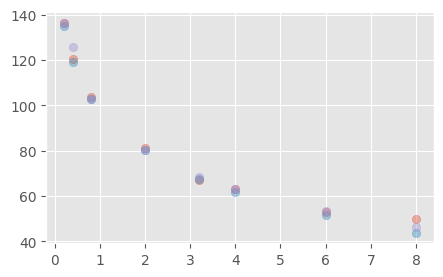

In [11]:
# Raw Data
df = pd.read_csv("data.csv")
plt.figure(figsize=(5,3))
plt.scatter(df["Conc(mg/L)"][:-2],df["Reading1"][:-2], alpha=0.4)
plt.scatter(df["Conc(mg/L)"][:-2],df["Reading2"][:-2], alpha=0.4)
plt.scatter(df["Conc(mg/L)"][:-2],df["Reading3"][:-2], alpha=0.4)

In [12]:
tp.table(np.array(df),headers=df.columns)

╭────────────┬────────────┬────────────┬────────────┬────────────╮
│     Sample │ Conc(mg/L) │   Reading1 │   Reading2 │   Reading3 │
├────────────┼────────────┼────────────┼────────────┼────────────┤
│       STD2 │          8 │       49.8 │       43.8 │       46.5 │
│       STD3 │          6 │         53 │       51.5 │       53.6 │
│       STD4 │          4 │       63.3 │       61.8 │       63.1 │
│       STD5 │        3.2 │       66.9 │       67.7 │       68.4 │
│       STD6 │          2 │         81 │       80.1 │       80.1 │
│       STD7 │        0.8 │      103.5 │      102.7 │      102.6 │
│       STD8 │        0.4 │      120.3 │        119 │      125.5 │
│       STD9 │        0.2 │      136.2 │      134.8 │      136.4 │
│         TP │        nan │       75.3 │       72.5 │       75.8 │
│  LakeWater │        nan │      148.8 │        147 │      147.1 │
╰────────────┴────────────┴────────────┴────────────┴────────────╯


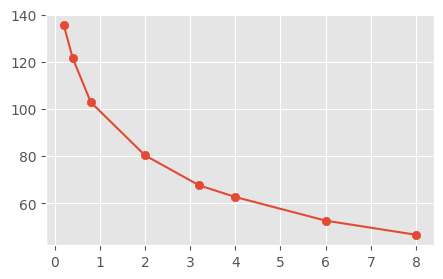

In [13]:
df = pd.read_csv("data.csv")
plt.figure(figsize=(5,3))
plt.plot(df["Conc(mg/L)"][:-2],np.mean([df["Reading1"][:-2],df["Reading2"][:-2],df["Reading3"][:-2]],axis=0))
plt.scatter(df["Conc(mg/L)"][:-2],np.mean([df["Reading1"][:-2],df["Reading2"][:-2],df["Reading3"][:-2]],axis=0))

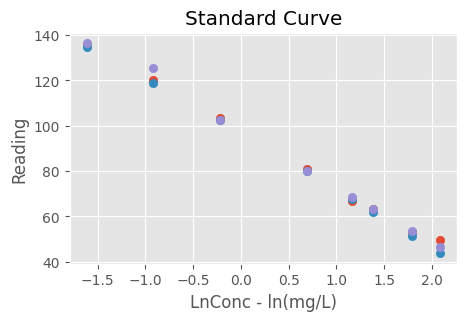

In [16]:
# After log
plt.figure(figsize=(5,3))
setText(plt, "Standard Curve","LnConc - ln(mg/L)","Reading")
plt.scatter(np.log(df["Conc(mg/L)"][:-2]),df["Reading1"][:-2])
plt.scatter(np.log(df["Conc(mg/L)"][:-2]),df["Reading2"][:-2])
plt.scatter(np.log(df["Conc(mg/L)"][:-2]),df["Reading3"][:-2])

In [70]:
# Self implement Gradient Descent linear regression
x = np.append(np.log(df["Conc(mg/L)"][:-2]),np.append(np.log(df["Conc(mg/L)"][:-2]),np.log(df["Conc(mg/L)"][:-2])))
y = np.array([df["Reading1"][:-2],df["Reading2"][:-2],df["Reading3"][:-2]]).flatten()
a = 1
b = 1
def f(x):
    global a,b
    return a*x+b

def E_a(x): #dE/da
    return -2*(y-f(x))*x  #wnagji f(x) kuohaolimianle-

def E_b(x):
    return -2*(y-f(x))

lr = 0.01
for epoch in range(10000):
    a-=np.mean(E_a(x)*lr)
    b-=np.mean(E_b(x)*lr)

r^2=0.9970443338517799 dE/da=1.5931700403370996e-13 dE/db=-6.856737400084967e-13


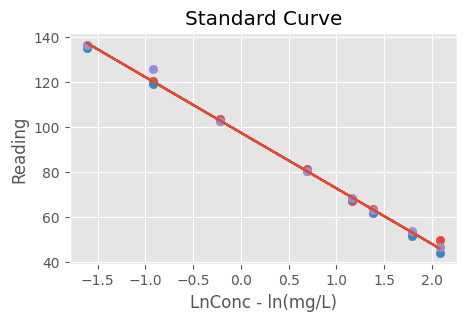

In [71]:
plt.figure(figsize=(5,3))
setText(plt, "Standard Curve","LnConc - ln(mg/L)","Reading")
plt.scatter(np.log(df["Conc(mg/L)"][:-2]),df["Reading1"][:-2])
plt.scatter(np.log(df["Conc(mg/L)"][:-2]),df["Reading2"][:-2])
plt.scatter(np.log(df["Conc(mg/L)"][:-2]),df["Reading3"][:-2])
plt.plot(x,f(x))
print(f"r^2={1-(np.sum((y-f(x))**2)/np.sum((y-np.mean(y))**2))} dE/da={np.mean(E_a(x))} dE/db={np.mean(E_b(x))}")